In [ ]:
print("hey")

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50 as PretrainedModel , preprocess_input
 

from IPython.display import SVG, Image
import tensorflow as tf

!pip install scikit-plot
import math
import numpy as np
import pandas as pd

import scikitplot
import seaborn as sns
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report



from keras.utils import np_utils

print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.4.1


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=aeb137ae5d63d152dbf1173494d8a18046060da7fb1312012e76f05f0d0ec430
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kreinisalex","key":"2a8caee10112a02c2582b4d82e060663"}'}

In [10]:
!ls /content/gdrive/MyDrive  

 a54ee0f59df6fdf4c7977dade4fea906701109323e57cce120535a57.jpg
'Colab Notebooks'
 d77973709410f99ebdfb89bfd2d1002733eee7b5b9fb3302c2e9cdc4.jpg
 d9806938647c021cd73c60f4590f5f6e96c129774deb30e99d2f2a4e.jpg
 da147dcd971a5c722656e69fb08a6c47f4ae14060a8feb6c58e5a5b7.jpg
 daeb0f0ee46d2818c5c59802cf3b50fbc101b888f4d630ad0d43cdde.jpg
 db524cccd9414539d675087ca195fe4ca58bc190f85c147787ce3ef1.jpg
 dc2c1da18552a15cb10e85ba5458900a7402d87b346f62ae5710401c.jpg
 dc5992ec55300e91ea09dfa31705cebd4686a686c2c65a0033d1c4cc.jpg
 dc91c96fc8cc78be499d83a59819d51caf3f4466c0545347054249bc.jpg
 dd111ac32e1f15e2763ad01d98be8a7ebb033eafb23d7c96347cbe1d.jpg
 dd7de20b3f4a6f5942456f600e637338563f48c2bebc89c6affb2573.jpeg
 de00ff74b126c1977348030509beb624c1083334f3249ee9383a160b.jpg
 de33c9ccfa280b7b450db74ac851bb1c0e3a8eda1d9897c494bf659e.jpg
 de81dfc1c5bb0d3af4ae0a84206d479365d8dc75edb8d5b34dd20e48.jpg
 df2db78b6548b867d5136c7170b538622acafb4ba310191a4a85091d.jpg
 df559c608c6f11234589f3f58a5ec47507daf5fa2aef8abdcc

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kreinisalex/telemojiafftest


 98% 457M/467M [00:06<00:00, 41.6MB/s]
100% 467M/467M [00:06<00:00, 72.8MB/s]


In [17]:
!unzip -qq -o telemojiafftest.zip

In [ ]:
!unzip -qq -o telealexpart1.zip
train_path = 'train'
valid_path = 'test'

In [18]:
train_path = 'train'
valid_path = 'test'

In [19]:
#width_shift_range=0.1, height_shift_range=0.1

img_size=96
batch_size=64
datagen_train=ImageDataGenerator(       
                                        width_shift_range=0.15,
                                        height_shift_range=0.15,
                                        shear_range=0.15,
                                        zoom_range=0.15,
                                        horizontal_flip=True,
                                        preprocessing_function=preprocess_input
                                    )
train_generator=datagen_train.flow_from_directory(
   train_path,
    target_size=(img_size,img_size),
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',   
    shuffle=True
)

datagen_validation=ImageDataGenerator(  preprocessing_function=preprocess_input)
validation_generator=datagen_validation.flow_from_directory(
   valid_path,
    target_size=(img_size,img_size),
    # color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',   
    shuffle=True,
)

Found 131718 images belonging to 7 classes.
Found 3500 images belonging to 7 classes.


In [20]:
from keras import regularizers

ptm = PretrainedModel(
    input_shape=[img_size,img_size,3],
    weights='imagenet',
    include_top=False)

x = Flatten()(ptm.output)

x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)

x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)


x = Dense(7, activation='softmax',kernel_initializer='random_uniform', bias_initializer='random_uniform', bias_regularizer=regularizers.l2(0.01), name='predictions')(x)

#opt=optimizers.Nadam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam')
opt=optimizers.RMSprop(learning_rate=0.0001)
model = Model(inputs=ptm.input, outputs=x)
model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=['accuracy']
)
model.summary()

94773248/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 102, 102, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 48, 48, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 48, 48, 64)   256         conv1_conv[0][0]                 
_____________________________

In [21]:

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]


In [ ]:

# optims = [
#     optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'),
#     optimizers.Adam(0.001),
# ]


In [ ]:
epochs=100

steps_per_epoch=train_generator.n//train_generator.batch_size

validation_steps=validation_generator.n//validation_generator.batch_size

history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks,
)

Epoch 1/100
2058/2058 [==============================] - 1596s 754ms/step - loss: 1.4483 - accuracy: 0.4590 - val_loss: 1.5169 - val_accuracy: 0.4630
Epoch 2/100
2058/2058 [==============================] - 1557s 756ms/step - loss: 1.0489 - accuracy: 0.6151 - val_loss: 1.3243 - val_accuracy: 0.5055
Epoch 3/100
2058/2058 [==============================] - 1566s 761ms/step - loss: 0.9856 - accuracy: 0.6363 - val_loss: 1.4033 - val_accuracy: 0.5324
Epoch 4/100
2058/2058 [==============================] - 1562s 759ms/step - loss: 0.9485 - accuracy: 0.6484 - val_loss: 1.2768 - val_accuracy: 0.5532
Epoch 5/100
2058/2058 [==============================] - 1566s 761ms/step - loss: 0.9232 - accuracy: 0.6590 - val_loss: 1.2968 - val_accuracy: 0.5480
Epoch 6/100
2058/2058 [==============================] - 1553s 755ms/step - loss: 0.9047 - accuracy: 0.6659 - val_loss: 1.2927 - val_accuracy: 0.5544
Epoch 7/100
2058/2058 [==============================] - 1539s 748ms/step - loss: 0.8869 - accuracy:

In [ ]:
scores=model.evaluate(validation_generator,verbose=0)
print("Accuracy is %.2f%%" %  (scores[1]*100))

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

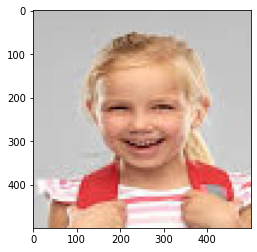

disgust


In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
emots=['angry','disgust','fear','happy','neutral','sad','suprise']
filename='happy.jpeg'
plt.imshow(image.load_img(filename))
plt.show()
img = cv2.imread(filename)
img = cv2.resize(img,(img_size,img_size))
img = np.reshape(img,[1,img_size,img_size,3])
classes = model.predict([img])
print(emots[np.argmax(classes[0])])

In [ ]:
model.save('/content/gdrive/MyDrive/affModal.h5')
!ls -lh

In [ ]:
# model2 = tf.keras.models.load_model('mymodal.h5')
# scores=model2.evaluate(validation_generator,verbose=0)
# print("Accuracy is %.2f%%" %  (scores[1]*100))

Accuracy is 64.66%


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(validation_generator.labels, p_test)
plot_confusion_matrix(cm, list(range(7)))

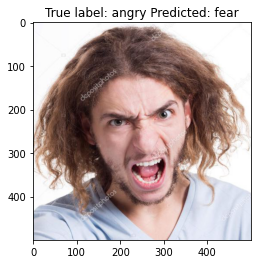

In [ ]:
misclassified_idx = np.where(p_test != validation_generator.labels)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(image.load_img(validation_generator.filepaths[i]))
plt.title("True label: %s Predicted: %s" % (emots[validation_generator.labels[i]], emots[p_test[i]]));

In [ ]:
emots=['angry','disgust','fear','happy','neutral','sad','suprise']
emotsCounter={'angry':0,'disgust':0,'fear':0,'happy':0,'neutral':0,'sad':0,'suprise':0}
#dirname="finalset/test/fear/"
for emot in emots:
  dirname="finalset/test/{0}/".format(emot)
  for filename in os.listdir(dirname):
          img_size=96
          # img = cv2.imread(directory+filename,cv2.IMREAD_GRAYSCALE)
          # plt.imshow(image.load_img(dirname+filename))
          # plt.show()
          img = cv2.imread(dirname+filename)
          img = cv2.resize(img,(img_size,img_size))
          img = np.reshape(img,[1,img_size,img_size,3])
          classes = model.predict([img])
          emotsCounter[emots[np.argmax(classes[0])]]+=1
     
  print('for {0} res is:'.format(emot),emotsCounter)
  emotsCounter={'angry':0,'disgust':0,'fear':0,'happy':0,'neutral':0,'sad':0,'suprise':0}              

NameError: ignored